# Cifar-100 ver2  이미지분류 - 업그레이드 적기


- Cifar 100 용 별도 모델
- 32/64/128 Conv2D node 수 
- Adam() optimizer 사용

In [ ]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [ ]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:
X_train.shape, X_test.shape, y_train.shape
# 컬러, 50000 데이터 테스트는 1만

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1))

In [ ]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster' 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

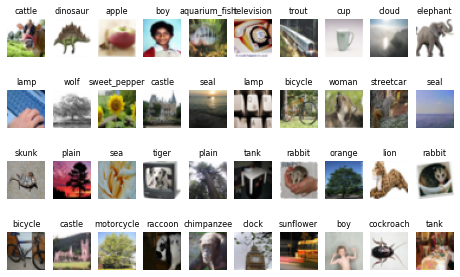

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize=8)
plt.show()
# 1주제당 500개 이미지 

In [ ]:
# X_data : 0~1 사이의 실수 (float32) 로 변환
# X_train = X_train.astype(float32) / 255.   or X_train = X_train / 255. ==> 64비트 실수
X_train = X_train.astype('float32') / 255.
X_test  = X_test.astype(np.float32) / 255.  

In [ ]:
# y_data : One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 100), (10000, 100))

## 모델 정의 / 설정 / 학습 / 평가

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.1),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         7

In [ ]:
model.compile(
    optimizer = 'adam',
    loss= 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model_path = 'best-cifar100-v2.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [ ]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=100, batch_size=32, verbose=2,
    callbacks = [checkpoint, early_stop]
)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 3.47445, saving model to best-cifar100-v2.h5
1250/1250 - 13s - loss: 4.0323 - accuracy: 0.0809 - val_loss: 3.4744 - val_accuracy: 0.1715 - 13s/epoch - 10ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 3.47445 to 3.09140, saving model to best-cifar100-v2.h5
1250/1250 - 4s - loss: 3.3894 - accuracy: 0.1851 - val_loss: 3.0914 - val_accuracy: 0.2493 - 4s/epoch - 3ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 3.09140 to 2.78956, saving model to best-cifar100-v2.h5
1250/1250 - 4s - loss: 3.0544 - accuracy: 0.2471 - val_loss: 2.7896 - val_accuracy: 0.3017 - 4s/epoch - 3ms/step
Epoch 4/100

Epoch 00004: val_loss improved from 2.78956 to 2.62094, saving model to best-cifar100-v2.h5
1250/1250 - 4s - loss: 2.8399 - accuracy: 0.2864 - val_loss: 2.6209 - val_accuracy: 0.3412 - 4s/epoch - 3ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 2.62094 to 2.55007, saving model to best-cifar100-v2.h5
1250/1250 - 4s - loss: 2

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
313/313 [==============================] - 1s 3ms/step - loss: 2.1970 - accuracy: 0.4409
[2.197026491165161, 0.4408999979496002]

313/313 [==============================] - 1s 3ms/step - loss: 2.1970 - accuracy: 0.4409


[2.197026491165161, 0.4408999979496002]

- 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

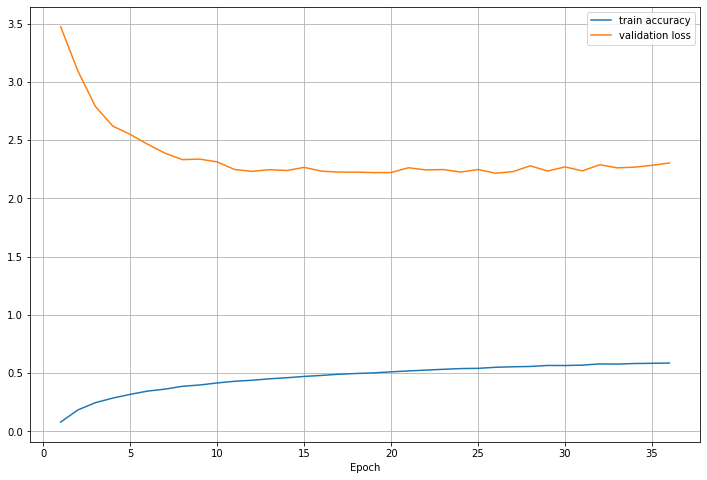

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()